# <font color=blue> Random matrices</font>

Compute eigen values and norms of eigen vectors of random matrices.

Let $E_n$ be the expected number of real eigenvalues of random normal matrix $M$ of shape $n \times n$. Than 
$$\lim\limits_{n \to \infty} \frac{E_n}{\sqrt n} = \sqrt{\frac{2}{\pi}}$$

In [14]:
import numpy as np
import tensorflow.compat.v1 as tf


uniform = tf.random.uniform(shape=[1000, 1000], minval=-1, maxval=1)
normal = tf.random.normal(shape=[1000, 1000])

e_un, v_un = tf.linalg.eigh(uniform)
e_no, v_no = tf.linalg.eigh(uniform)

rotation = tf.constant([[1., 1.], [-1., 1.]])
e_rot, v_rot = tf.linalg.eigh(rotation)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
with tf.Session(config=config) as sess:
    eun, evn, eno, vno, erot, vrot = sess.run([e_un, v_un, e_no, v_no, e_rot, v_rot])
    print(len(eun))
    print(erot)
    print(vrot)
    print("Number of complex in uniform:", np.sum(np.iscomplex(eun).astype(int)))
    print("Number of complex in normal:", np.sum(np.iscomplex(eno).astype(int)))
    print("Number of complex in rotation:", np.sum(np.iscomplex(erot).astype(int)))

1000
[0.        1.9999999]
[[ 0.70710677  0.70710677]
 [ 0.70710677 -0.70710677]]
Number of complex in uniform: 0
Number of complex in normal: 0
Number of complex in rotation: 0


In [19]:
!pip install matplotlib

  Using cached https://files.pythonhosted.org/packages/57/4f/dd381ecf6c6ab9bcdaa8ea912e866dedc6e696756156d8ecc087e20817e2/matplotlib-3.1.1-cp36-cp36m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/f7/d2/e07d3ebb2bd7af696440ce7e754c59dd546ffe1bbe732c8ab68b9c834e61/cycler-0.10.0-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 811kB/s eta 0:00:01


974


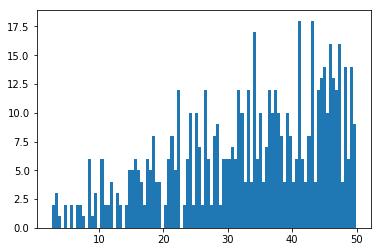

In [6]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np


m = (np.random.randn(1000, 1000) - 1.) * 2
e, v = np.linalg.eig(m)
n = np.sum(np.iscomplex(e).astype(int))
print(n)
a = np.abs(e)
a = np.extract(a < 50, a)
# print(a)
plt.hist(a, bins=100)
plt.yscale('linear')
plt.show()

Computing eigen values of kernel change. Thr kernel change is computed as follows.

$$\Omega^\ell = \sum_{b=1}^B {h^{\ell-1,b}}^T \pi^{\ell, b}$$

982


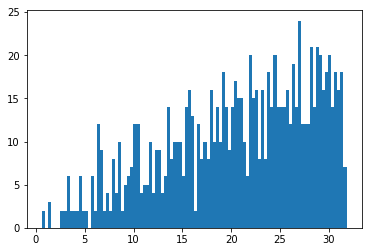

In [7]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np


matrix = np.zeros((100, 1000, 1000))

for _ in range(100):
    matrix += np.random.randn(100, 1000, 1) * np.random.randn(100, 1, 1000)

matrix = np.sum(matrix, axis=0)
sigma = np.mean(matrix**2)**0.5
matrix /= sigma

e, v = np.linalg.eig(matrix)
n = np.sum(np.iscomplex(e).astype(int))
print(n)
a = np.abs(e)
a = np.extract(a < 500, a)
# print(a)
plt.hist(a, bins=100)
plt.yscale('linear')
plt.show()

In [12]:
import numpy as np


def get_normal_real_eigen_matrix(n):
    d = np.random.randn(n)
    eigen_vectors_basis_m = np.diag(d)
    eigen_vectors = np.random.randn(n, n)
    
    norms = np.linalg.norm(eigen_vectors, axis=0, keepdims=True)
    # print(norms)
    eigen_vectors /= norms
    print(eigen_vectors[10:, 10:])
    inv = np.linalg.inv(eigen_vectors)
    print(inv[10:, 10:])
    matrix = inv @ eigen_vectors_basis_m @ eigen_vectors
    return matrix


def get_diag_matrix(n):
    d = np.random.randn(n)
    return np.diag(d)

[[ 0.012081    0.0200243   0.01635927 ...  0.01183312  0.00077174
  -0.04855943]
 [ 0.00013382 -0.00085033  0.00105765 ... -0.03570288 -0.05233384
  -0.03459693]
 [ 0.00346729 -0.00518812  0.01693182 ... -0.02802612  0.01897172
   0.0281387 ]
 ...
 [-0.0232477  -0.12064904  0.06294077 ...  0.015372    0.01126619
   0.04083935]
 [-0.00783774 -0.00688078 -0.04642929 ...  0.05046186 -0.05861172
   0.03637235]
 [ 0.01326008  0.01509607  0.02384601 ... -0.028725   -0.03248443
  -0.03795488]]
[[ 0.48982579  0.0938397  -0.05708689 ...  1.36792245 -0.50586927
  -1.64509336]
 [ 9.01208357 -4.11490766  7.66710315 ...  0.26222639 -5.35408345
  -5.40271811]
 [-8.88457953  2.43819943 -4.42028257 ... -4.15728202  8.39082776
   6.4920817 ]
 ...
 [ 1.85915099 -1.7432165   1.41154218 ...  2.56253463 -2.37105779
  -2.82968081]
 [ 3.09936566 -1.75403867  2.5319695  ... -0.22115318 -2.0949119
  -1.62826862]
 [ 1.54153438 -0.71299416  1.93608095 ... -0.4868587  -0.4414522
  -0.17625493]]
[[-2.72319507e+00 

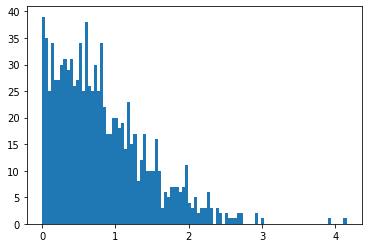

In [13]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np


m = get_normal_real_eigen_matrix(1000)
print(m[:10, :10])
e, v = np.linalg.eig(m)
n = np.sum(np.iscomplex(e).astype(int))
print(n)
a = np.abs(e)
a = np.extract(a < 50, a)
# print(a)
plt.hist(a, bins=100)
plt.yscale('linear')
plt.show()

0


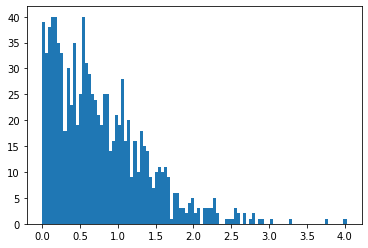

In [5]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np


m = get_diag_matrix(1000)
e, v = np.linalg.eig(m)
n = np.sum(np.iscomplex(e).astype(int))
print(n)
a = np.abs(e)
a = np.extract(a < 50, a)
# print(a)
plt.hist(a, bins=100)
plt.yscale('linear')
plt.show()